In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO

import matplotlib.pylab as pylab
import warnings
import time
warnings.filterwarnings("ignore")

import scipy.stats as stats
import os



# All libs for ML tasks
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedShuffleSplit, ShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from xgboost import plot_importance # plot feature importances
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor



In [2]:
data = pd.read_csv('/home/mangxu/MachineLearning/CreditScoreChallenge/Data/CommpleteFilledTrain.csv',
                        index_col= 'id')


In [4]:
data.columns

Index(['label', 'Field_3', 'Field_4', 'Field_10', 'Field_12', 'Field_13',
       'Field_19', 'Field_20', 'Field_21', 'Field_22', 'Field_23', 'Field_27',
       'Field_28', 'Field_29', 'namSinh', 'gioiTinh', 'Field_36', 'Field_38',
       'Field_39', 'Field_41', 'Field_42', 'Field_47', 'Field_50', 'Field_51',
       'Field_53', 'Field_54', 'Field_55', 'Field_58', 'Field_59', 'Field_60',
       'Field_62', 'Field_63', 'Field_64', 'Field_65', 'Field_66', 'Field_67',
       'Field_69', 'Field_70', 'Field_71', 'Field_72', 'Field_73', 'Field_74',
       'Field_75', 'Field_76', 'Field_77', 'info_social_sex',
       'subscriberCount', 'topFriends', 'numOrg', 'F_numOrg', 'F_numQuery',
       'E_numOrg', 'E_numQuery', 'C_numOrg', 'C_numQuery', 'C_startDate',
       'C_endDate', 'G_numOrg', 'G_numQuery', 'A_numOrg', 'A_numQuery',
       'summary_6m', 'summary_3m', 'summary_1m', 'summary_1w', 'partner0_A',
       'partner0_B', 'partner0_C', 'partner0_D', 'partner0_E', 'partner0_F',
       'partner

In [6]:
splitter= StratifiedShuffleSplit(train_size= 0.7, random_state= 76)

for train_idx, test_idx in splitter.split(data, data['label']):
    train_data = data.iloc[train_idx]
    test_data = data.iloc[test_idx]

In [7]:

X_train = train_data.drop(['label'], axis = 1)
y_train = train_data.label.values

X_test = test_data.drop(['label'], axis = 1)
y_test = test_data.label.values

# # get categorical columns
cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'object']
# X_train = pd.get_dummies(X_train, columns= cat_cols)
# X_test = pd.get_dummies(X_test, columns= cat_cols)

In [8]:

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
onehot_encoder= OneHotEncoder()

label_encoder.fit(X_train[['brief']])

LabelEncoder()

In [22]:
cat_cols

['Field_4',
 'Field_12',
 'gioiTinh',
 'Field_36',
 'Field_38',
 'Field_47',
 'Field_54',
 'Field_55',
 'Field_62',
 'Field_65',
 'Field_66',
 'info_social_sex',
 'C_startDate',
 'C_endDate',
 'brief']

In [23]:
for i in X_train.Field_38.value_counts().index:
    print(type(i))

<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>


In [24]:
for col in cat_cols:
    print (col)
    label_encoder.fit_transform(X_train[[col]])
    print ("Done",col)

Field_4
Done Field_4
Field_12
Done Field_12
gioiTinh
Done gioiTinh
Field_36
Done Field_36
Field_38


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [12]:
label_encoder.transform(X_test[['brief']])

,brief
id,
44292,1
13836,0
1717,1
17410,0
26822,1
...,...
43561,1
29583,19
13816,0


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

tune_params = {'n_estimators': [1000],
              'min_samples_split': [50],
              'max_features': [100]}

cv = 3

# Step 1: Scale the data

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)


# Step 2: tuning the parameter
if (tune_params != None):
    grid = GridSearchCV (model, param_grid= tune_params, cv = cv)
    #Time the tuning process
    start = time.time()
    grid.fit(X_train, y_train)
    end = time.time()
    time_taken = end - start
    grid = grid.best_estimator_
    #print ("It took ", round(time_taken/60, 2), "minutes to tune the parameters.")
else:
    grid = model
    grid.fit(X_scaled, y)
    time_taken = 0


In [22]:
y_preds = grid.predict(X_test)

ValueError: Number of features of the model must match the input. Model n_features is 834 and input n_features is 793 

In [ ]:
confusion_matrix(y_test, y_preds)

In [ ]:
accuracy_score(y_test, y_preds)

In [ ]:
# svc = SVC()
# svc.fit(X_train, y_train)

In [ ]:
(roc_auc_score(y_test, y_preds)*2)-1

In [28]:
0.78*2-1

0.56

In [35]:
data = pd.read_csv('/home/mangxu/MachineLearning/CreditScoreChallenge/Data/train_set_drop_duplicates.csv')

In [49]:
fields5 = ['Field_78', 'Field_79', 'Field_80', 'Field_81', 'Field_82']

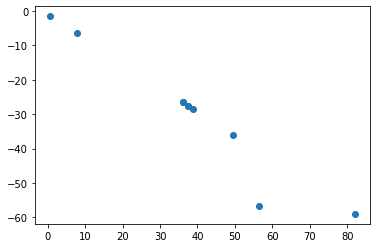

In [59]:

# check plots of fiel78 and field 79 when field 80 missing

fields5_missing78 = data[(data.Field_78.isnull())] 
plt.scatter(fields5_missing78.Field_79, fields5_missing78.Field_80)


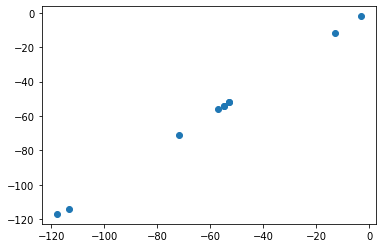

In [63]:
plt.scatter(fields5_missing78.Field_80*2, fields5_missing78.Field_81)


In [62]:
fields5_missing78

,id,label,Field_1,Field_2,Field_3,Field_4,Field_5,Field_6,Field_7,Field_8,...,partner5_A,partner5_D,partner5_G,brief,num_of_phone,Field_78,Field_79,Field_80,Field_81,Field_82
0,0,1,2019-07-24T03:39:02.854Z,2019-07-31T20:10:02Z,1.0,GH,2018-12-27,2018-12-27,2019-01-01,2019-07-31,...,0.0,0.0,0.0,cb1,1.0,NaN,NaN,NaN,NaN,1
1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,4,1.0,NaN,NaN,NaN,NaN,1
7,7,1,2019-12-04T09:08:34Z,2019-12-04T09:08:34Z,2.0,T1,2019-07-09,2019-07-09,2019-07-04,2020-01-03,...,0.0,0.0,0.0,notfound,1.0,NaN,NaN,NaN,NaN,1
9,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1,1.0,NaN,NaN,NaN,NaN,1
16,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1cy,1.0,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53018,53018,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1,1.0,NaN,NaN,NaN,NaN,4
53019,53019,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2,1.0,NaN,NaN,NaN,NaN,1
53021,53021,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,4
53027,53027,0,2017-11-11T17:15:01.948Z,2017-11-11T17:15:01.948Z,2.0,T1,2017-07-22,2017-07-22,2017-07-01,2017-11-30,...,0.0,0.0,0.0,notfound,1.0,NaN,NaN,NaN,NaN,1


In [92]:
plt.rcParams['figure.figsize'] = (15,12)
sns.set_style('whitegrid')


In [116]:
def scatter_plot(df, col1, col2):
    plt.rcParams['figure.figsize'] = (15,12)
    sns.set_style('whitegrid')

    sns.scatterplot(df[col1], df[col2])
    lim_max = round(max(np.nanmax(df[col2].values) , np.nanmax(df[col1].values)) + 10)
    lim_min = round(min(np.nanmin(df[col2].values) , np.nanmin(df[col1].values)) - 10)
    plt.axis([lim_min, lim_max, lim_min, lim_max])
    plt.plot([lim_min, lim_max], [lim_min, lim_max], 'r--')

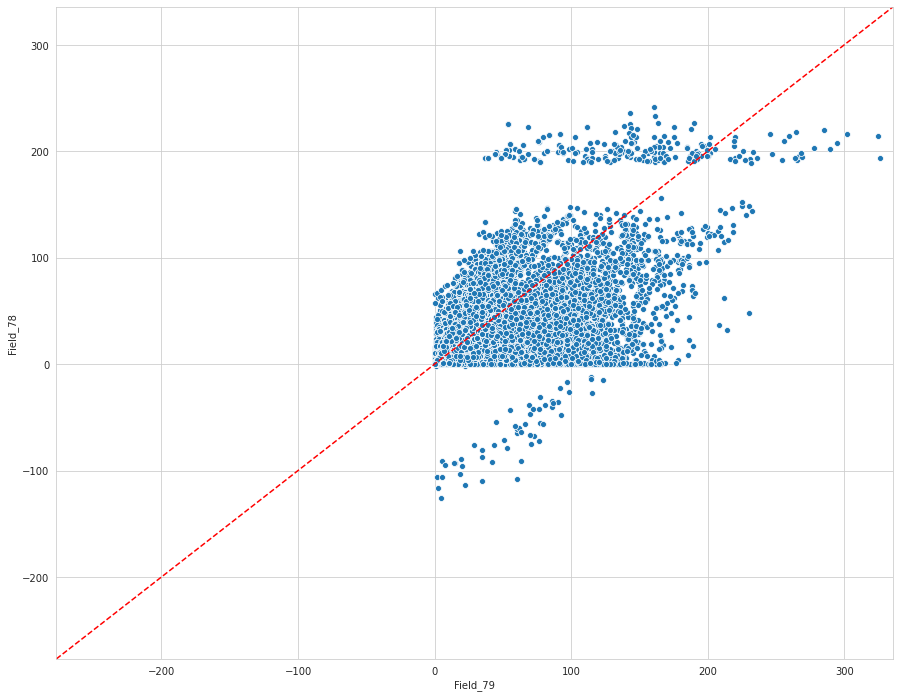

In [117]:
scatter_plot(data, 'Field_79', 'Field_78')

## Field 78 >= Field 80

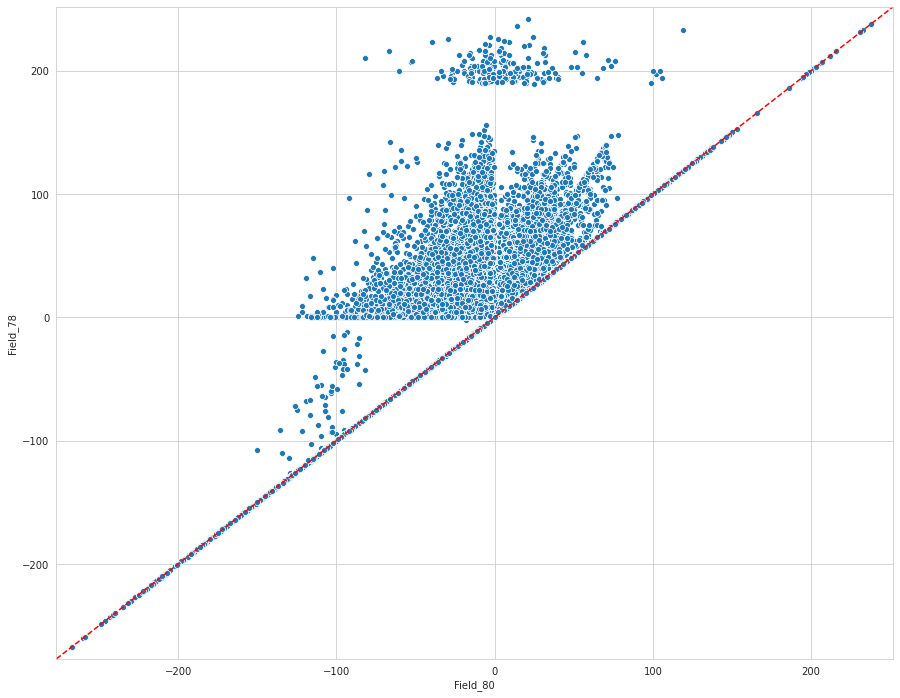

In [118]:
scatter_plot(data, 'Field_80', 'Field_78')

## Field_78 >= Field 81

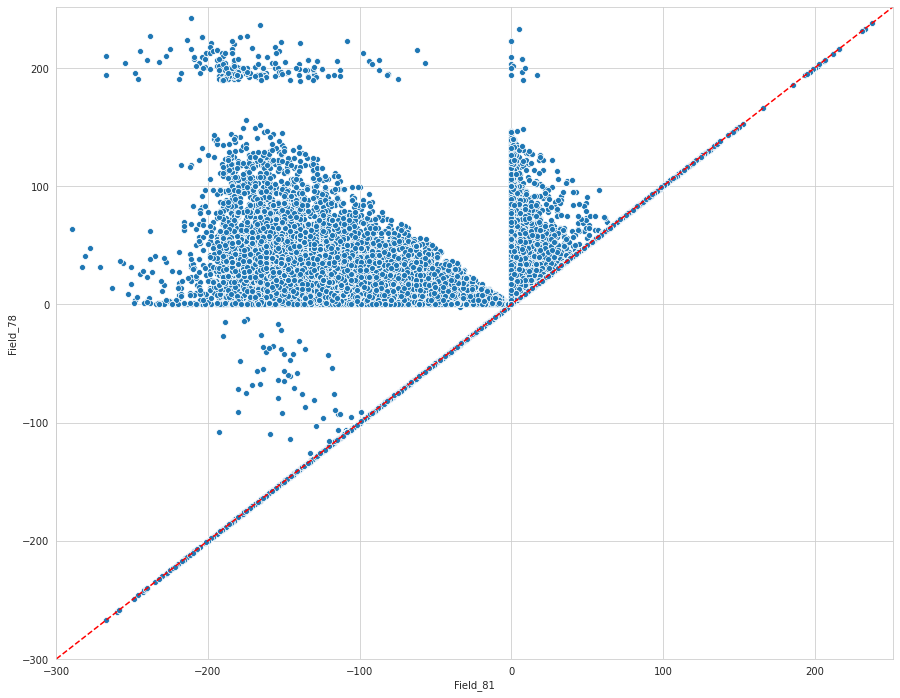

In [120]:
scatter_plot(data, 'Field_81', 'Field_78')

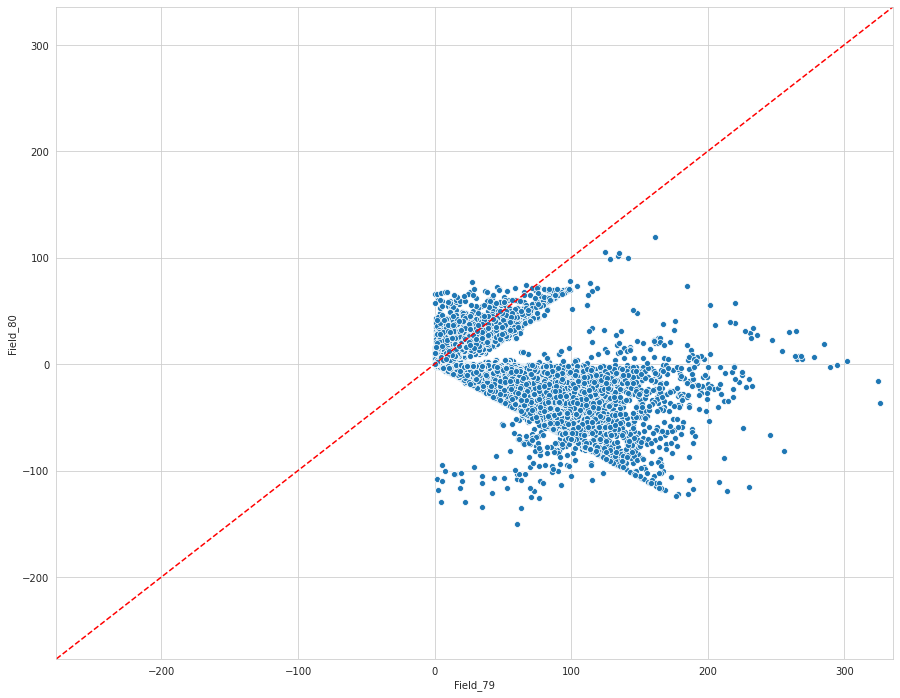

In [122]:
scatter_plot(data, 'Field_79', 'Field_80')

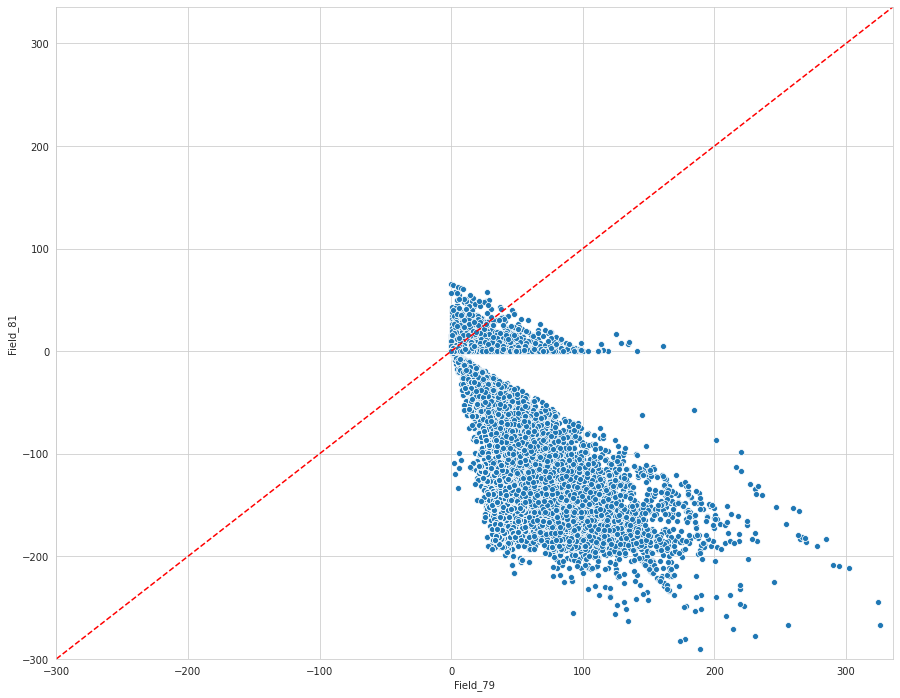

In [123]:
scatter_plot(data, 'Field_79', 'Field_81')

## Field 80 >= Field 81

In [134]:
def scatter_plot(df, col1, col2):
    plt.rcParams['figure.figsize'] = (15,12)
    sns.set_style('whitegrid')

    sns.scatterplot(df[col1], df[col2])
    lim_max = round(max(np.nanmax(df[col2].values) , np.nanmax(df[col1].values)) + 1)
    lim_min = round(min(np.nanmin(df[col2].values) , np.nanmin(df[col1].values)) - 1)
    plt.axis([lim_min, lim_max, lim_min, lim_max])
#     plt.plot([lim_min, lim_max], [lim_min, lim_max], 'r--')

In [139]:
import re

matcher = re.compile('^partner')
list_of_string = [s for s in data.columns if matcher.match(s)]

In [447]:
data.partner0_H.value_counts()

0.0    47759
1.0      524
Name: partner0_H, dtype: int64

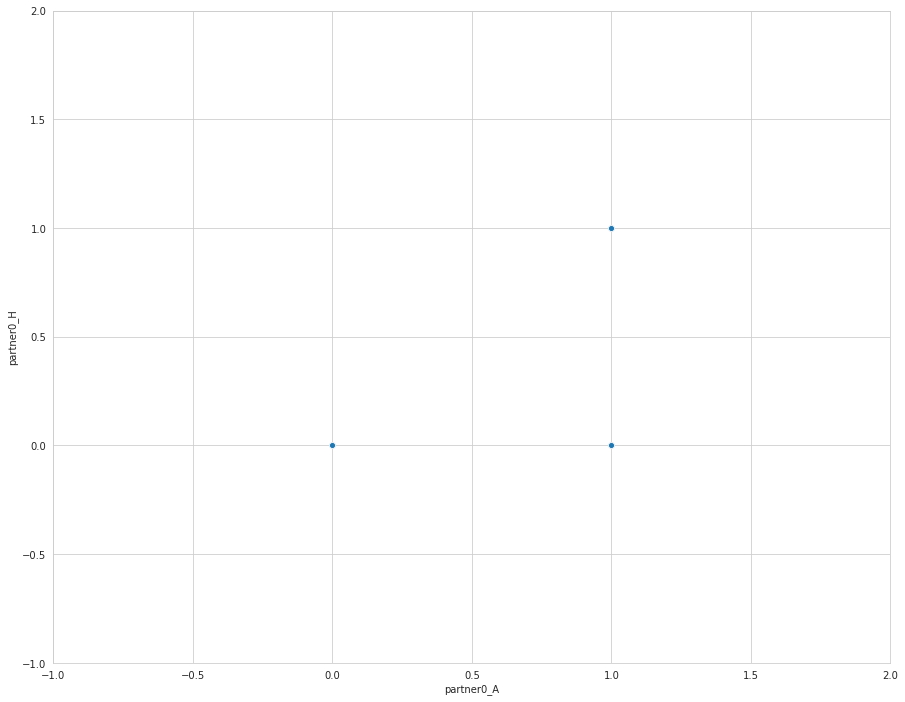

In [145]:
scatter_plot(data, 'partner0_A', 'partner0_H')

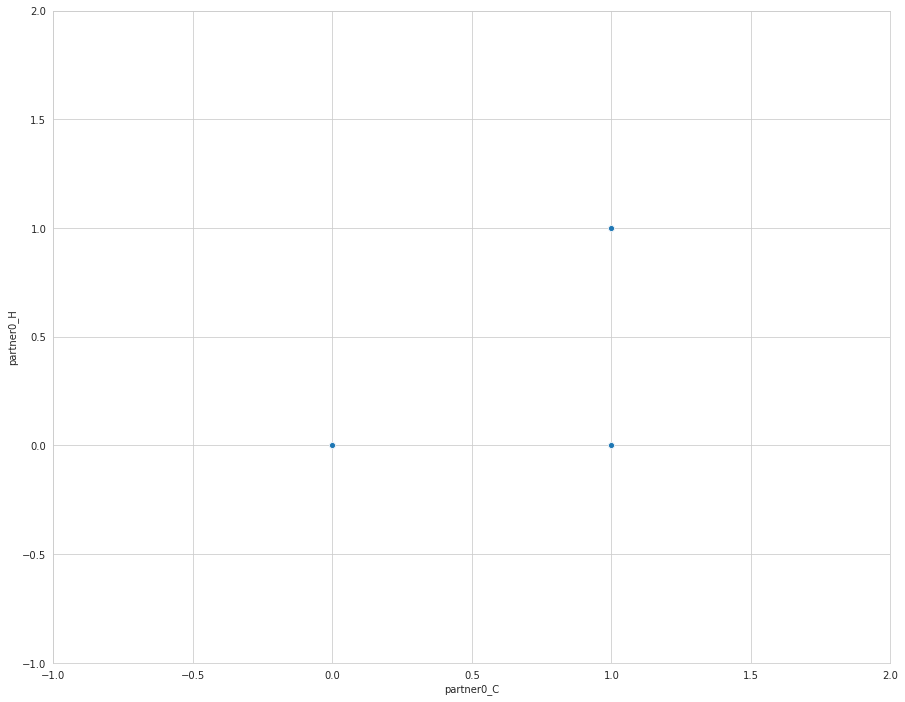

In [177]:
scatter_plot(data, 'partner0_C', 'partner0_H')

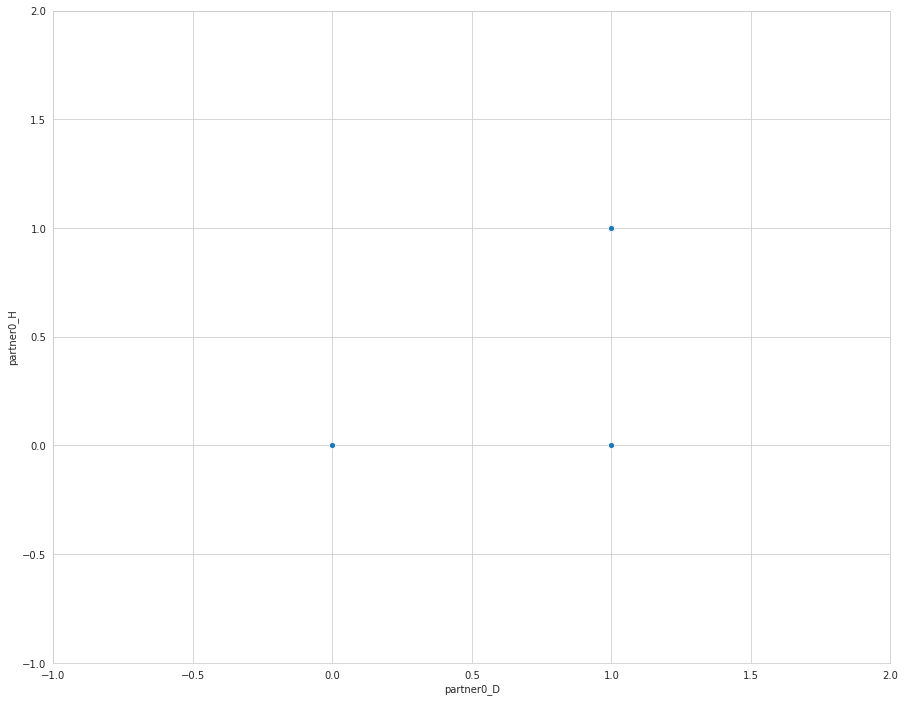

In [200]:
scatter_plot(data, 'partner0_D', 'partner0_H')

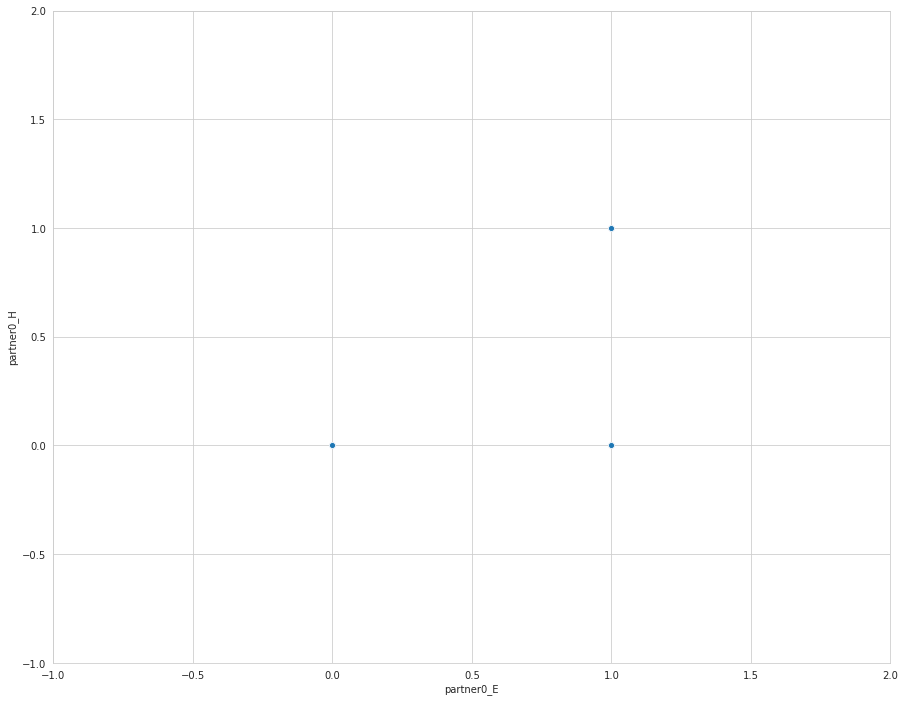

In [221]:
scatter_plot(data, 'partner0_E', 'partner0_H')

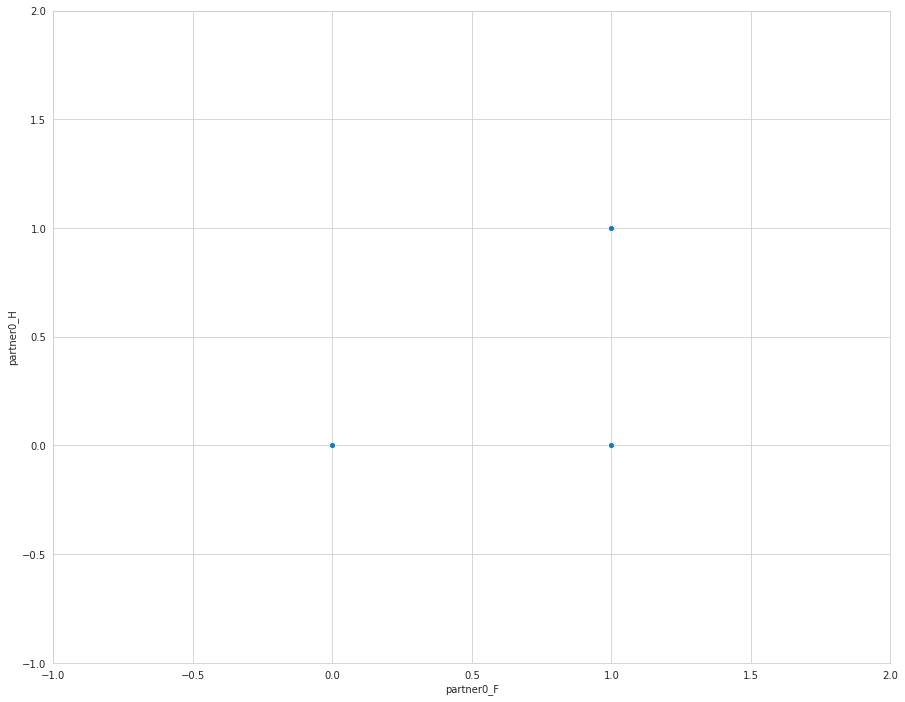

In [241]:
scatter_plot(data, 'partner0_F', 'partner0_H')

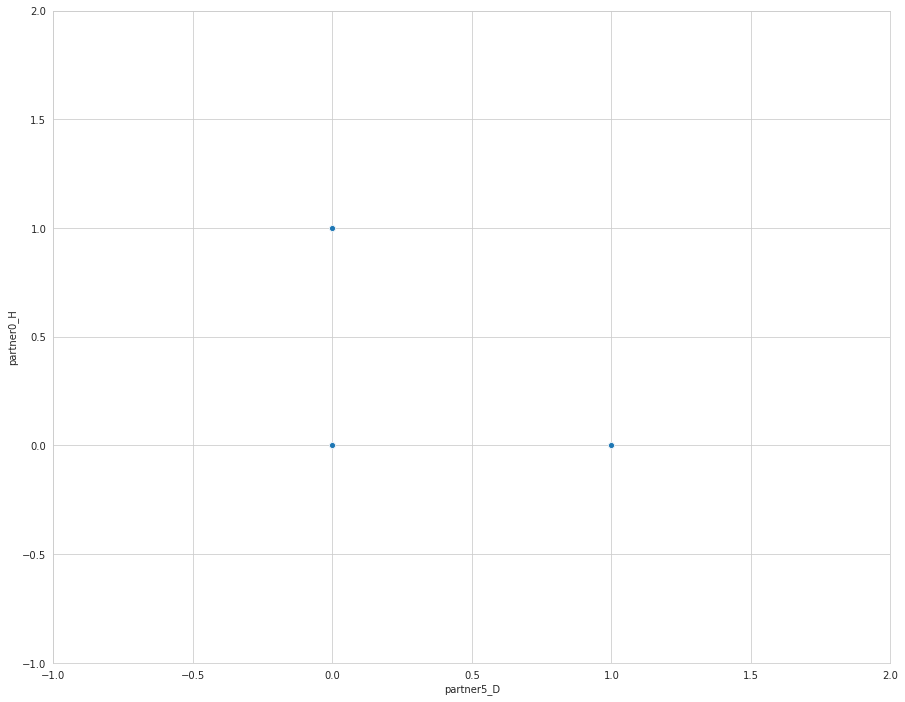

In [449]:
scatter_plot(data, 'partner5_D','partner0_H')

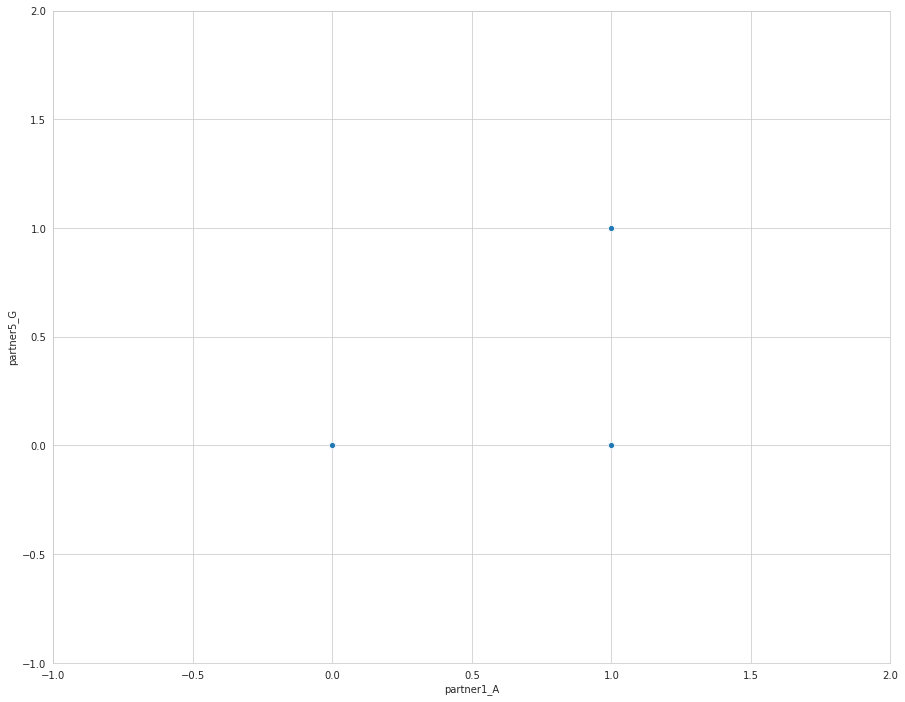

In [299]:
scatter_plot(data, 'partner1_A', 'partner5_G')

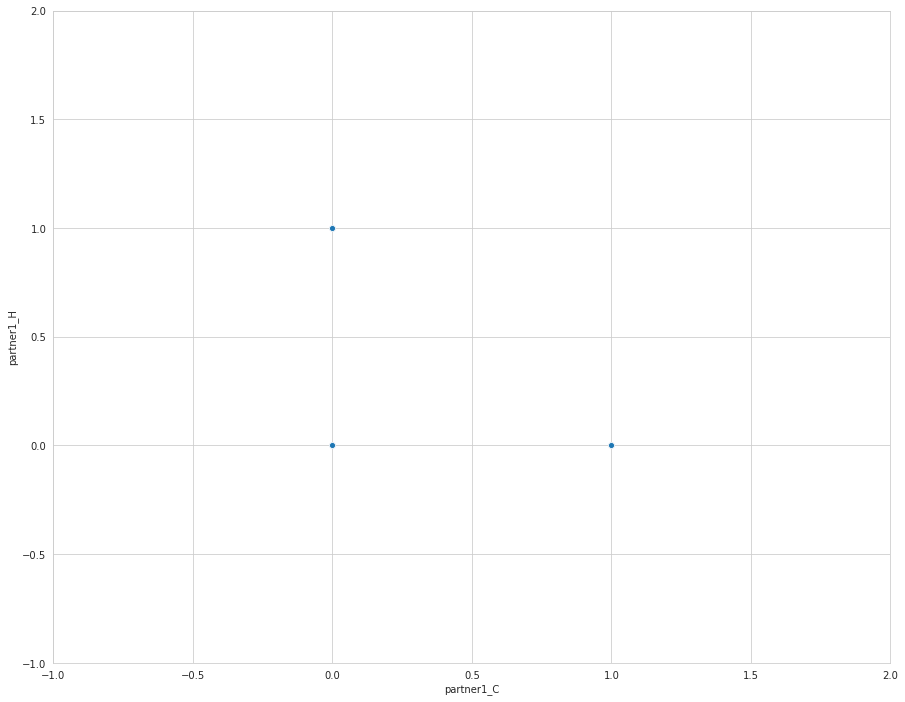

In [321]:
scatter_plot(data, 'partner1_C', 'partner1_H')

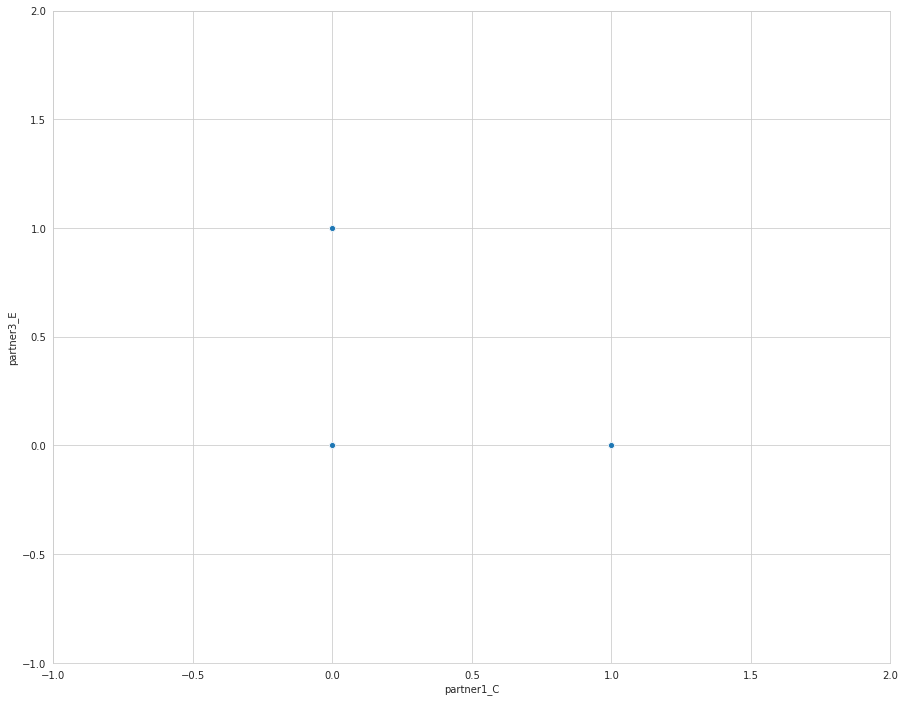

In [330]:
scatter_plot(data, 'partner1_C', 'partner3_E')

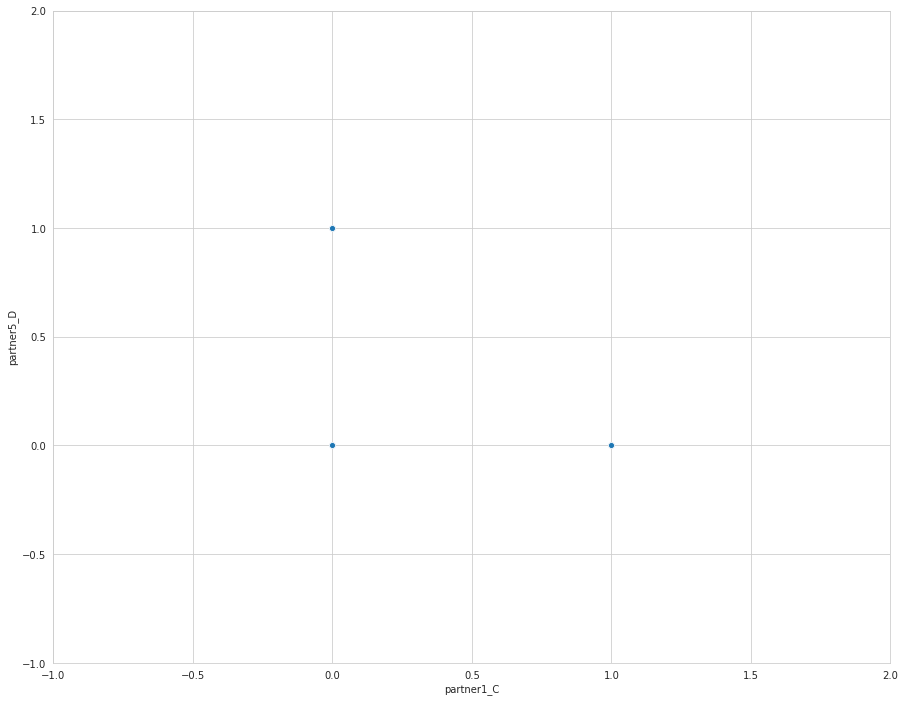

In [333]:
scatter_plot(data, 'partner1_C', 'partner5_D')

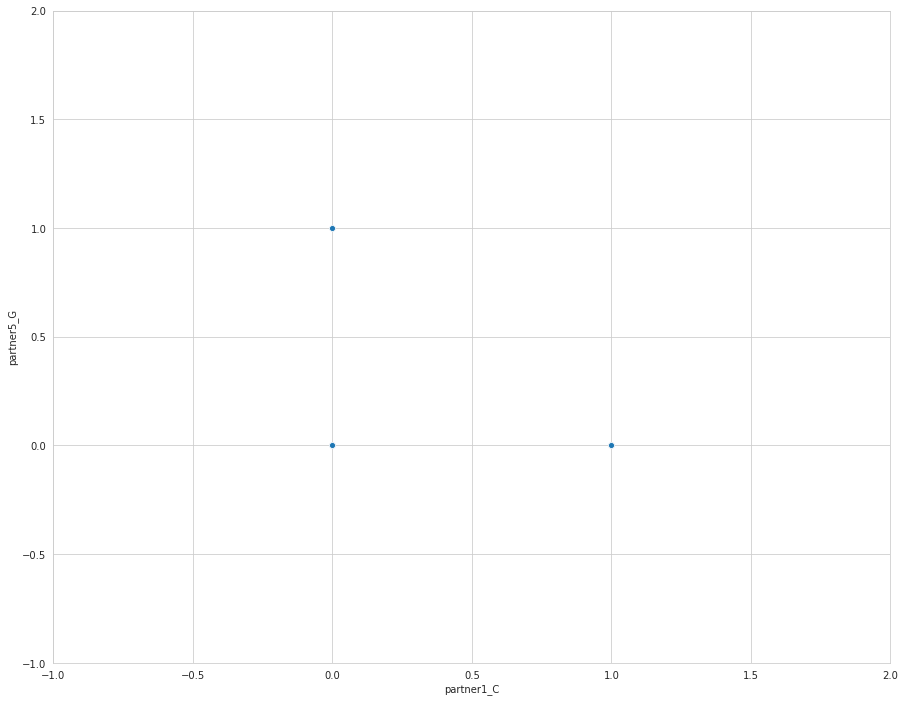

In [334]:
scatter_plot(data, 'partner1_C', 'partner5_G')

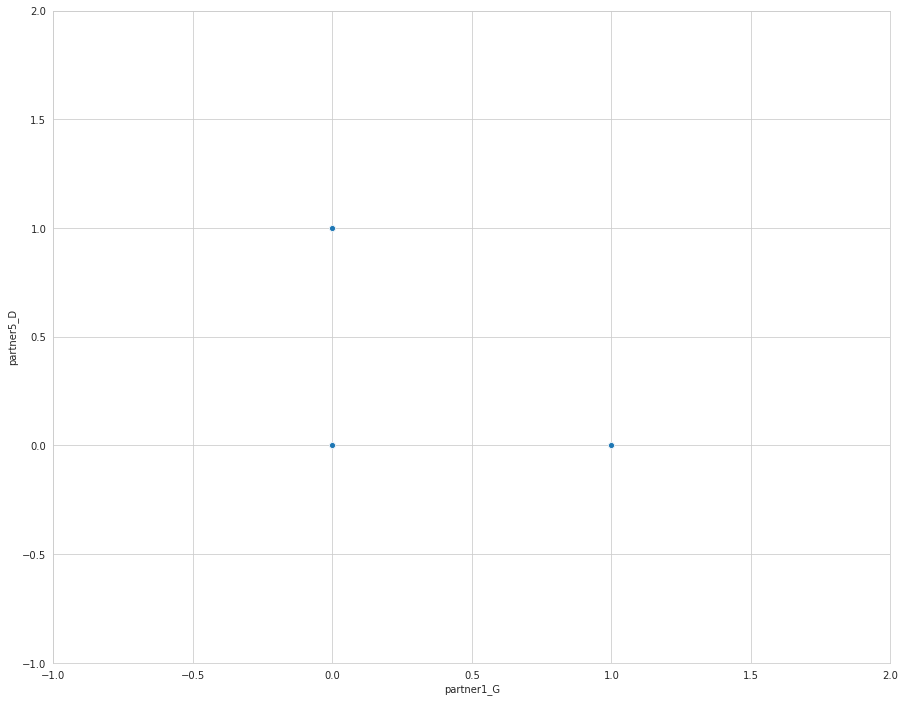

In [348]:
scatter_plot(data, 'partner1_G', 'partner5_D')

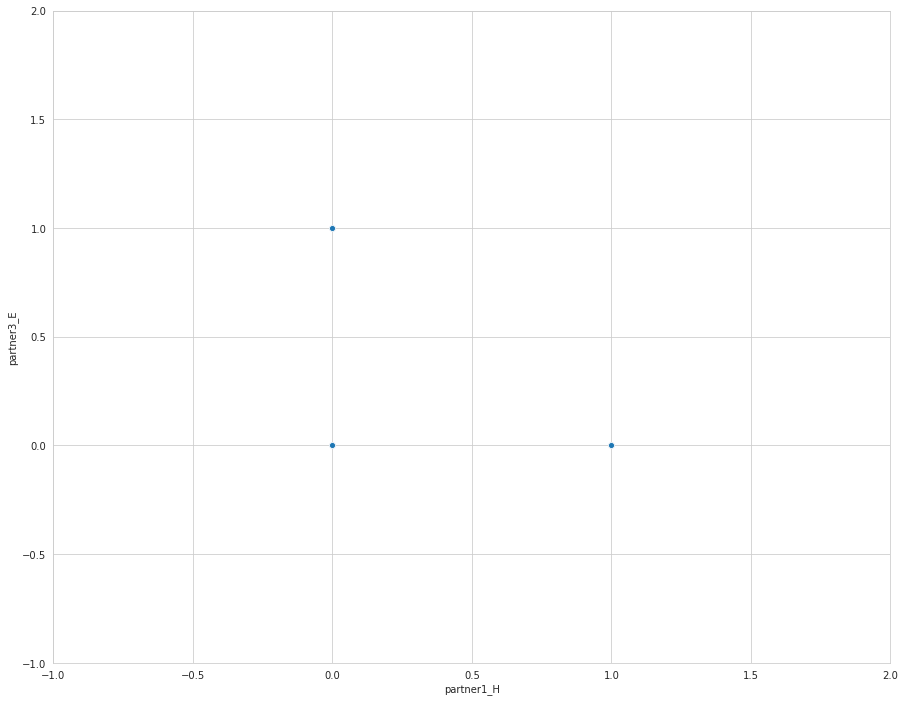

In [360]:
scatter_plot(data, 'partner1_H', 'partner3_E')

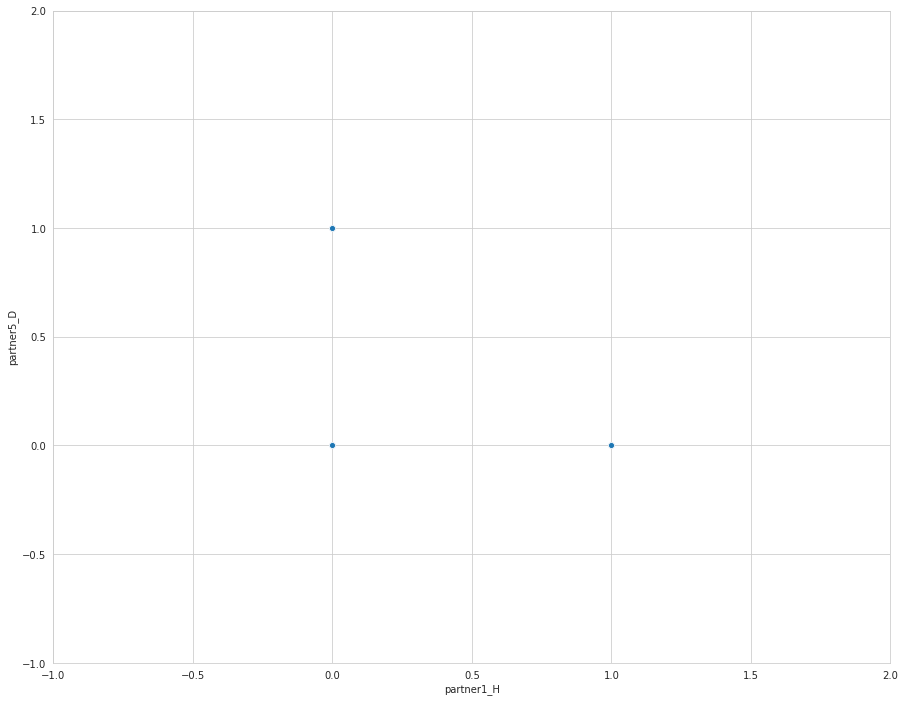

In [365]:
scatter_plot(data, 'partner1_H', 'partner5_D')

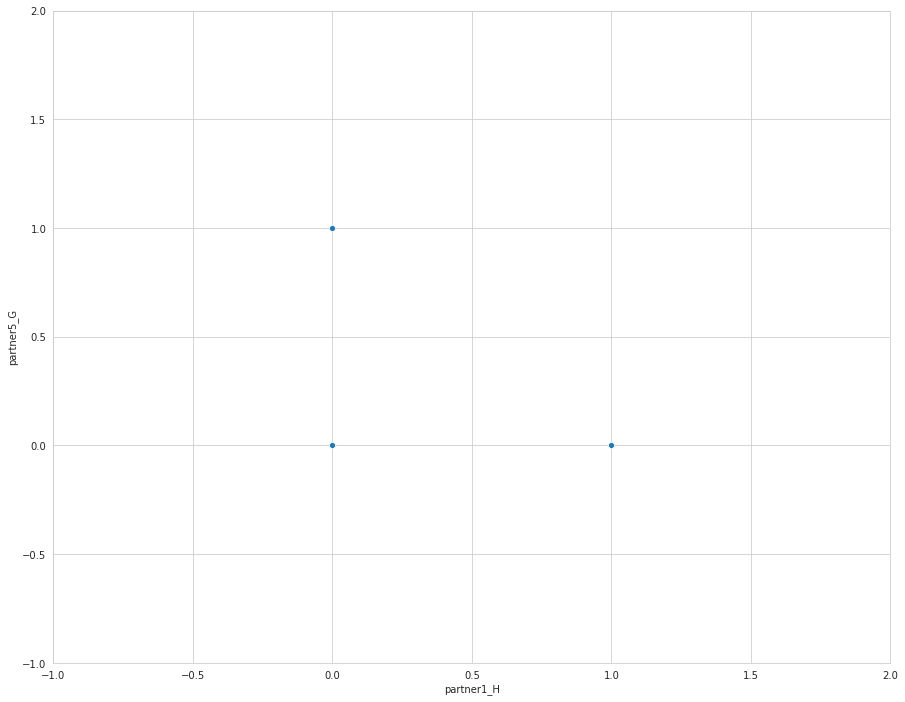

In [366]:
scatter_plot(data, 'partner1_H', 'partner5_G')

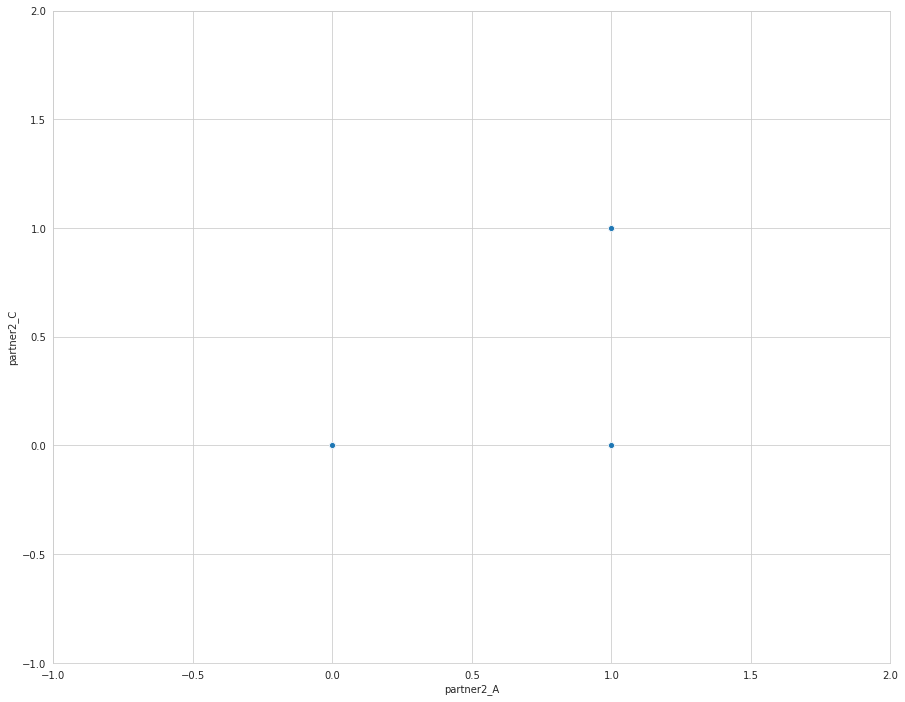

In [368]:
scatter_plot(data, 'partner2_A', 'partner2_C')

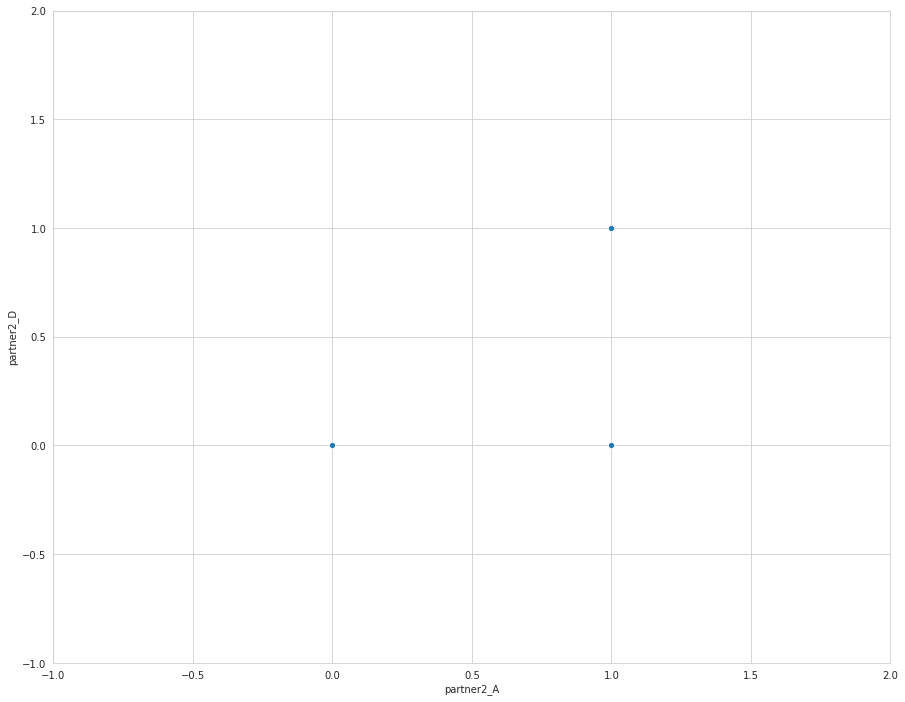

In [369]:
scatter_plot(data, 'partner2_A', 'partner2_D')

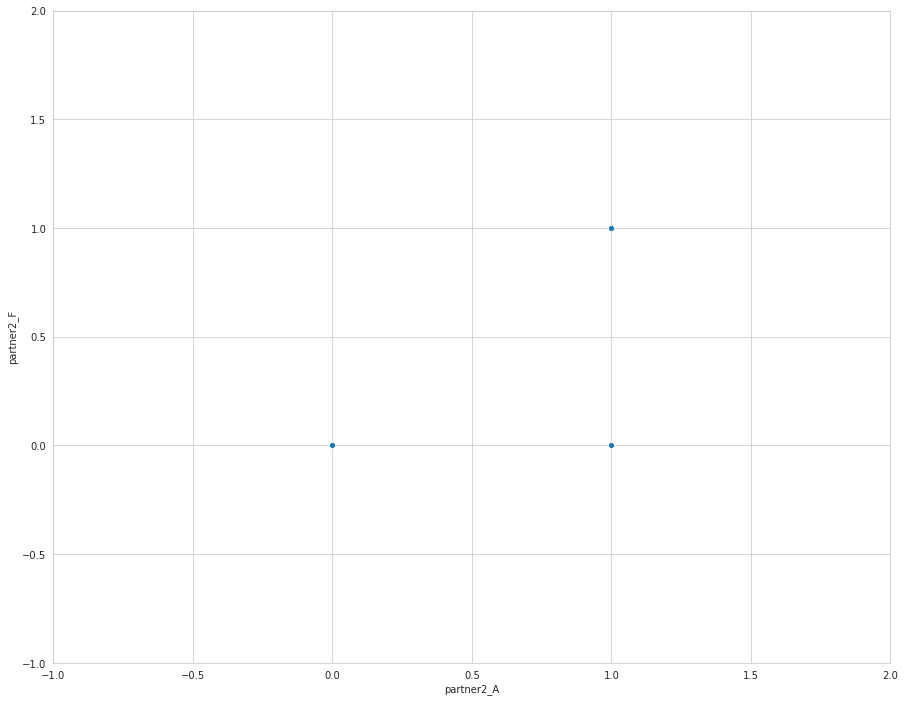

In [371]:
scatter_plot(data, 'partner2_A', 'partner2_F')

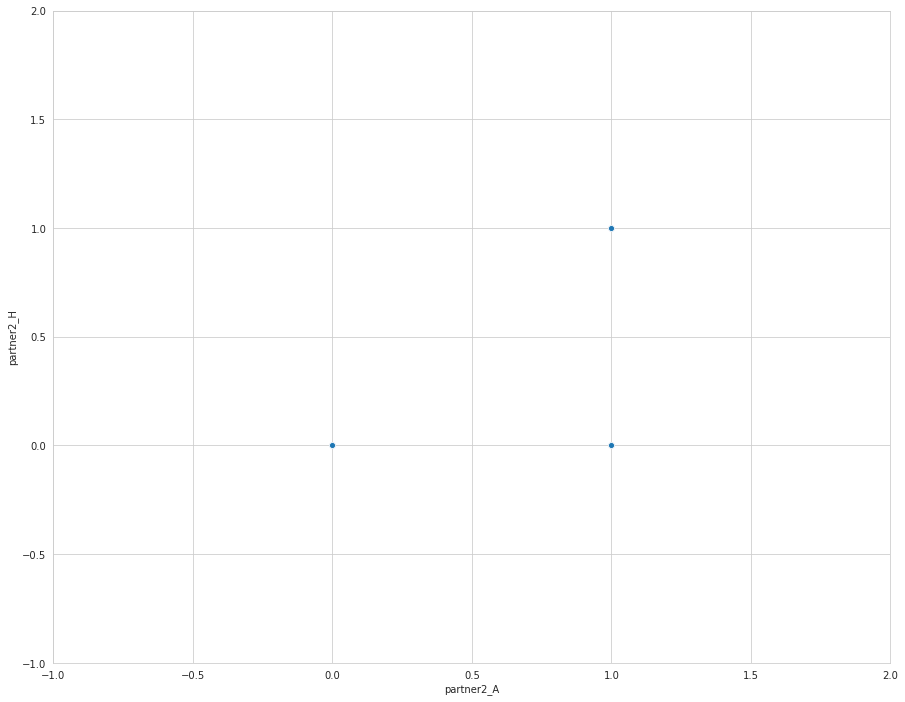

In [372]:
scatter_plot(data, 'partner2_A', 'partner2_H')

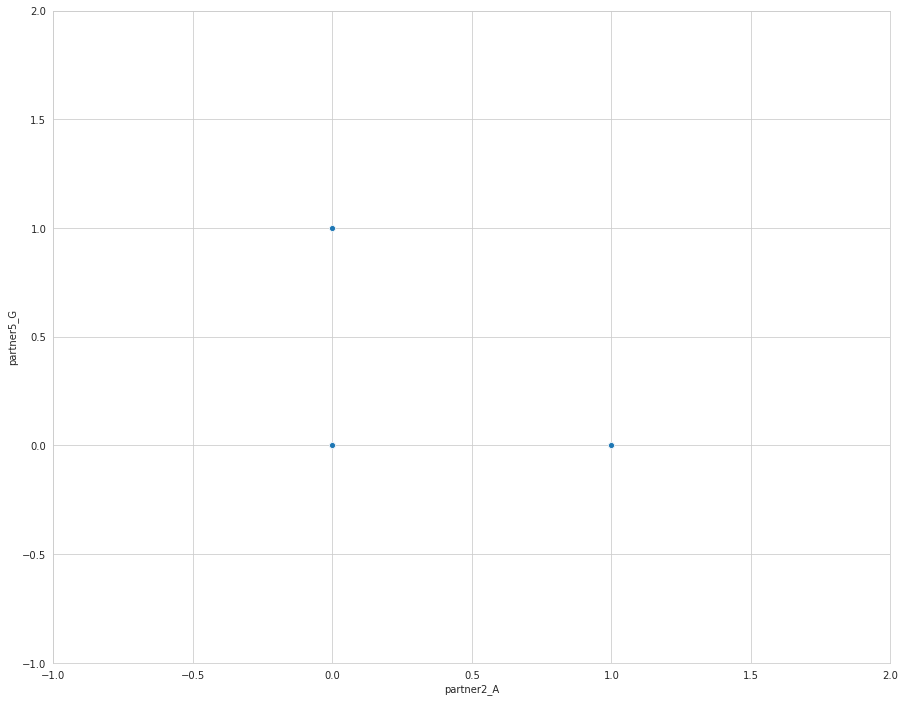

In [380]:
scatter_plot(data, 'partner2_A', 'partner5_G')

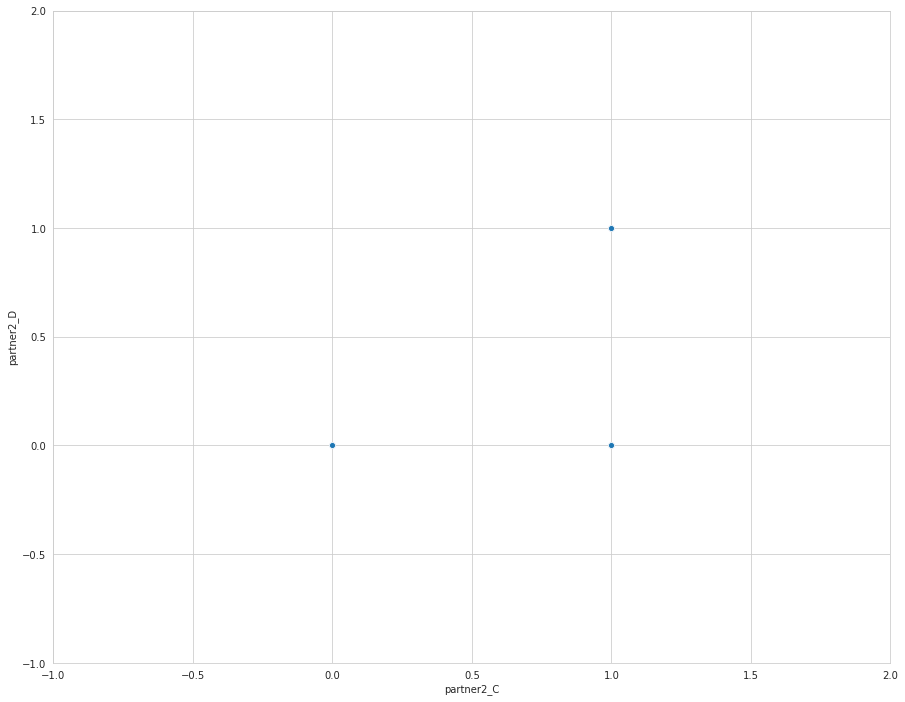

In [382]:
scatter_plot(data, 'partner2_C', 'partner2_D')

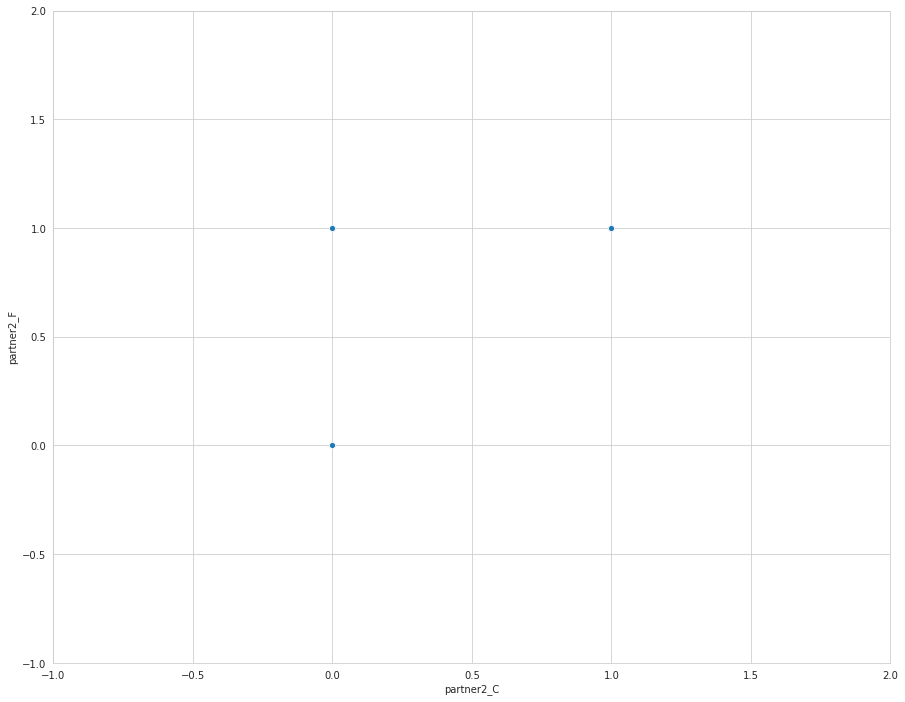

In [383]:
scatter_plot(data, 'partner2_C', 'partner2_F')

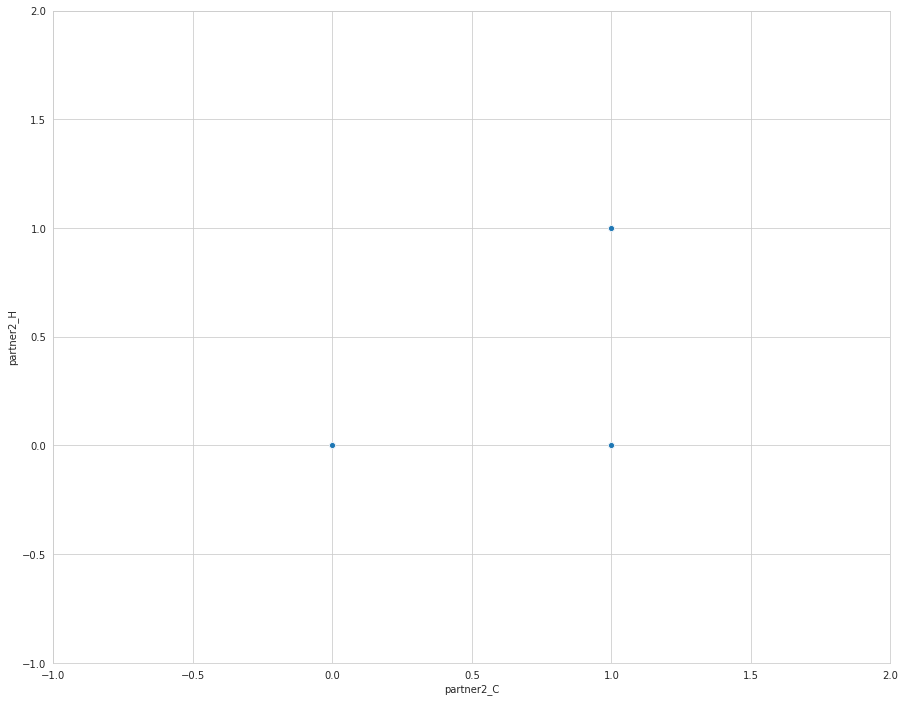

In [384]:
scatter_plot(data, 'partner2_C', 'partner2_H')

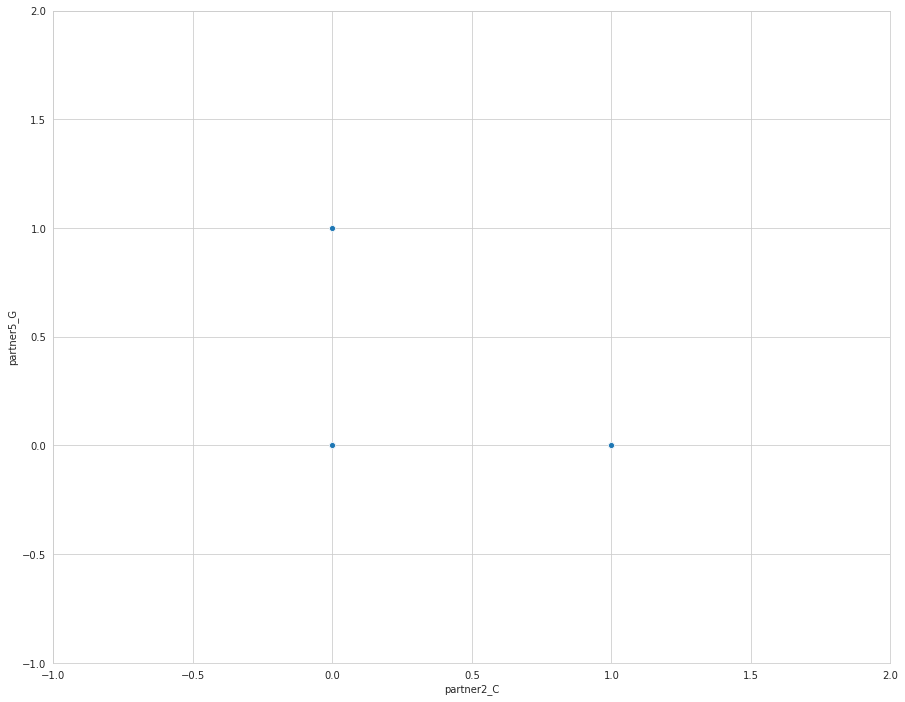

In [393]:

scatter_plot(data, 'partner2_C', 'partner5_G')

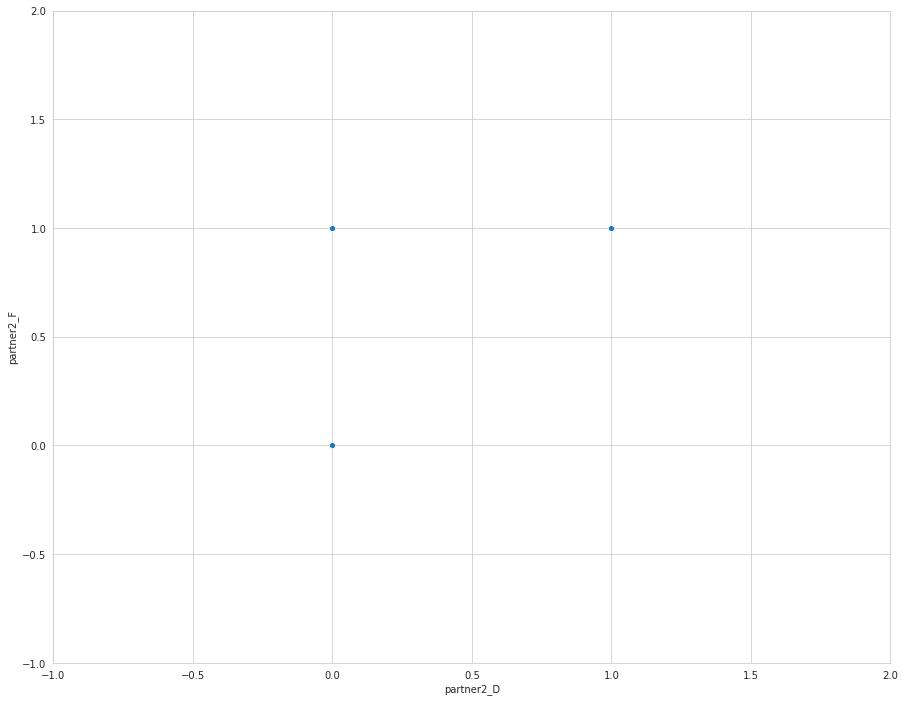

In [396]:

scatter_plot(data, 'partner2_D', 'partner2_F')

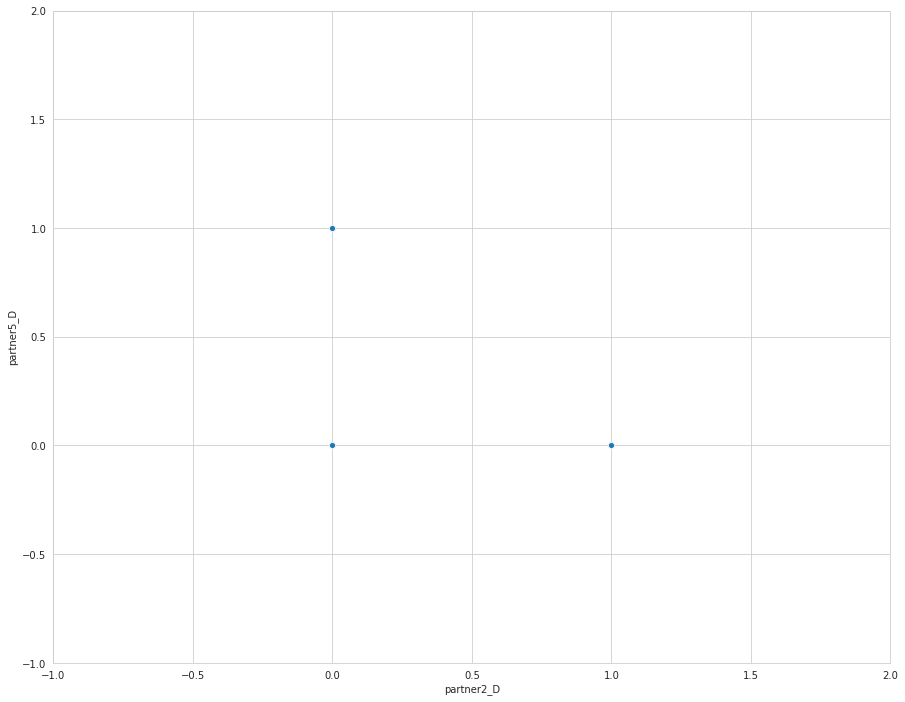

In [403]:

scatter_plot(data, 'partner2_D', 'partner5_D')

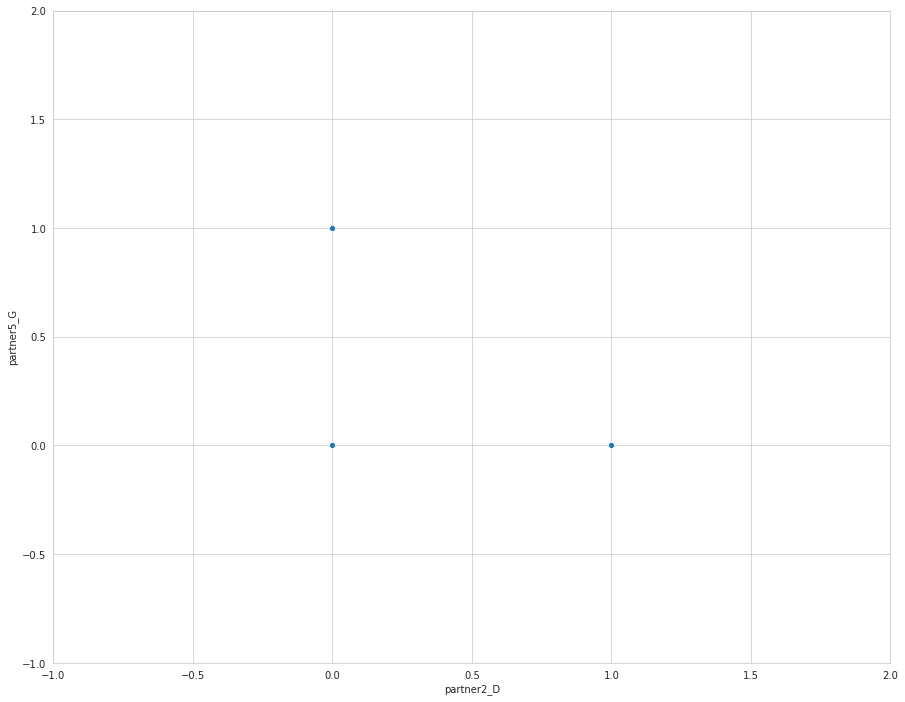

In [404]:
scatter_plot(data, 'partner2_D', 'partner5_G')

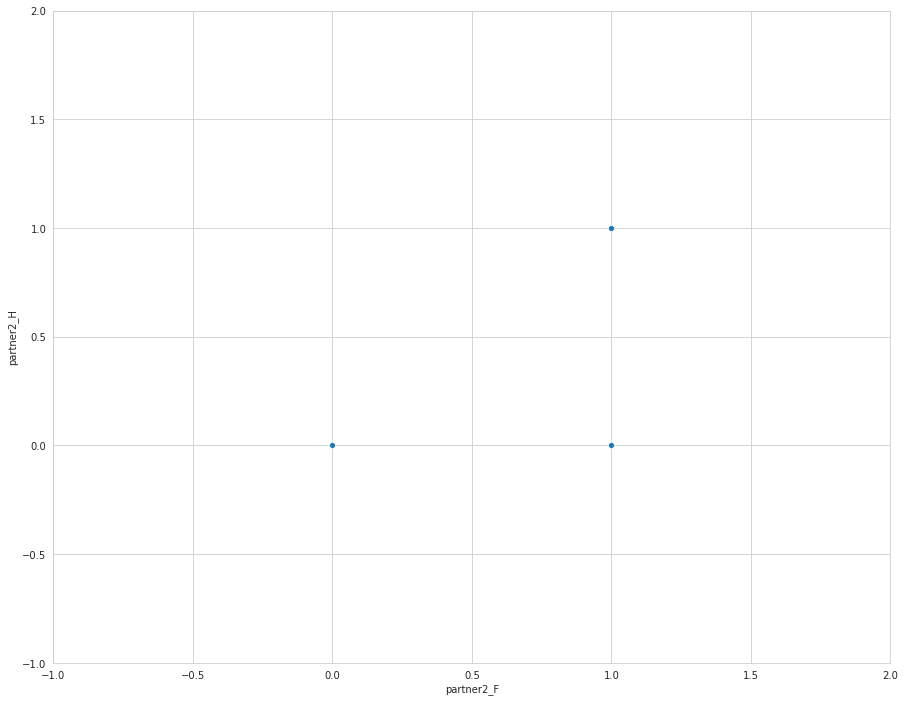

In [407]:
scatter_plot(data, 'partner2_F', 'partner2_H')

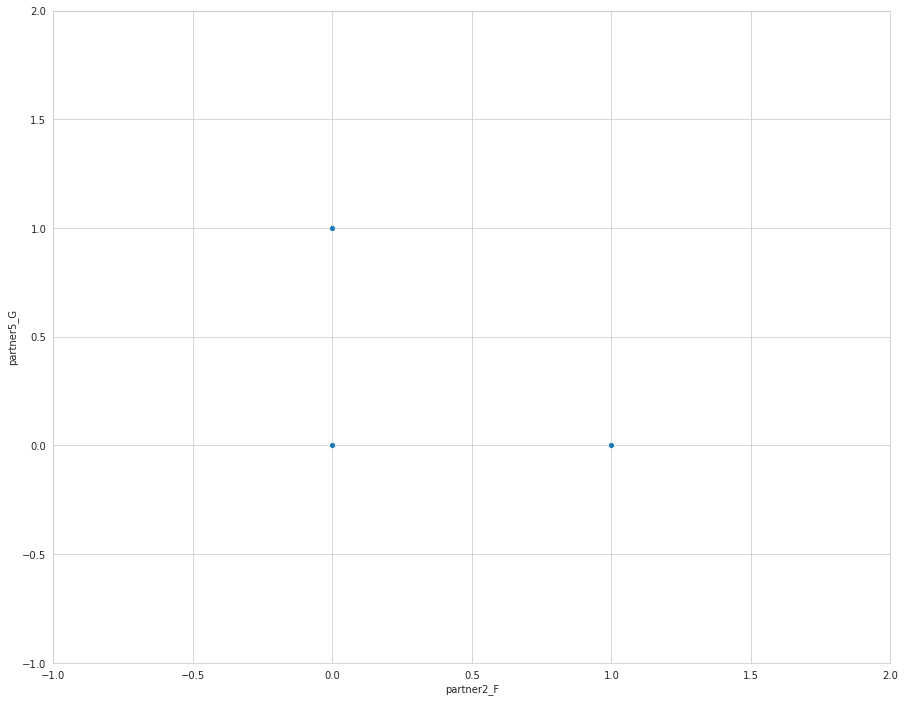

In [414]:
scatter_plot(data, 'partner2_F', 'partner5_G')

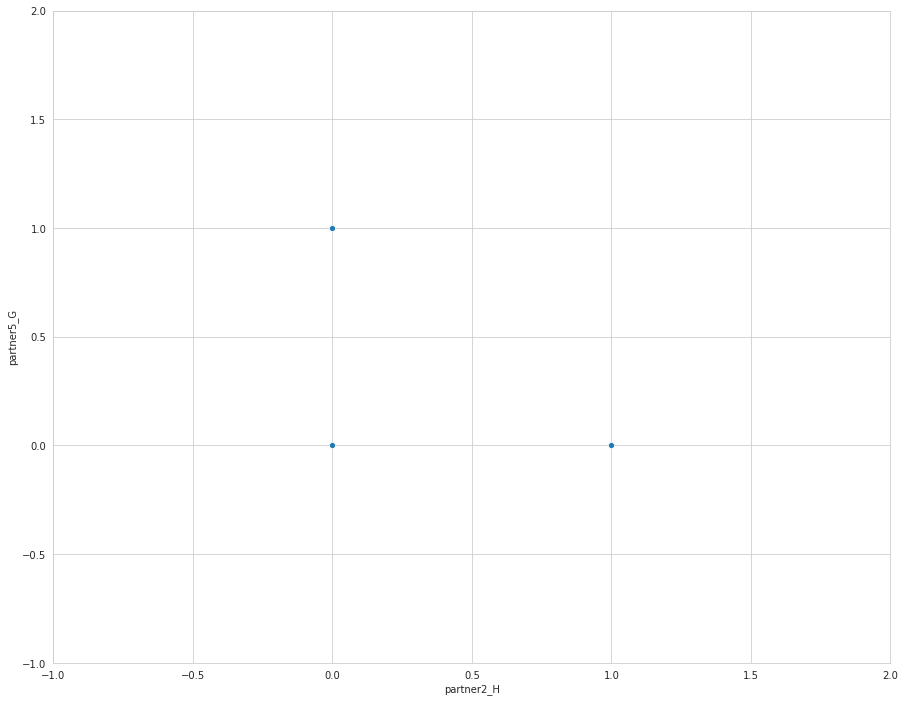

In [422]:
scatter_plot(data, 'partner2_H', 'partner5_G')

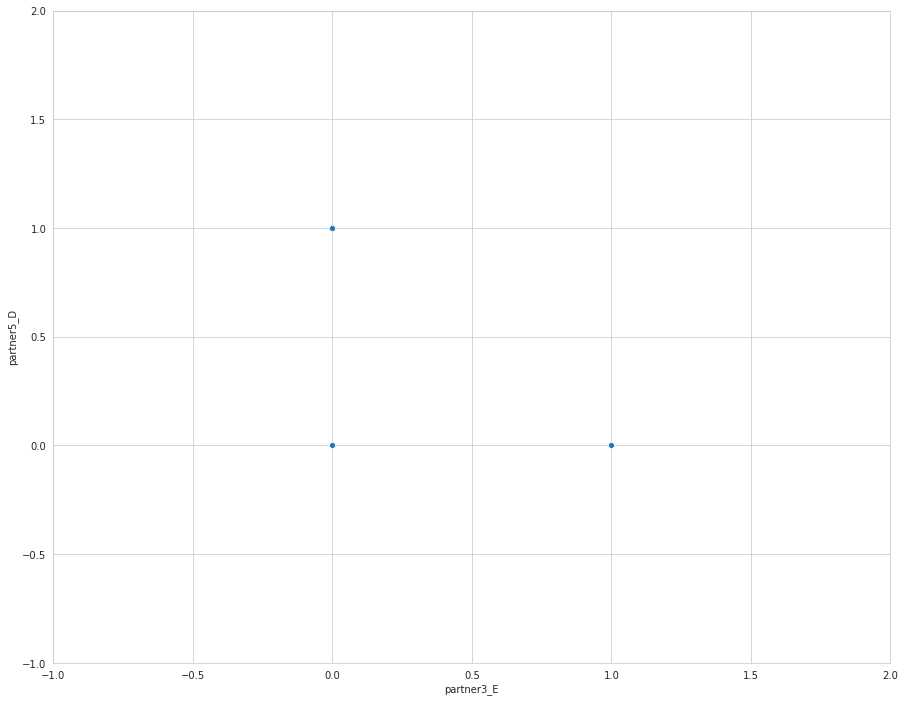

In [438]:
scatter_plot(data, 'partner3_E', 'partner5_D')

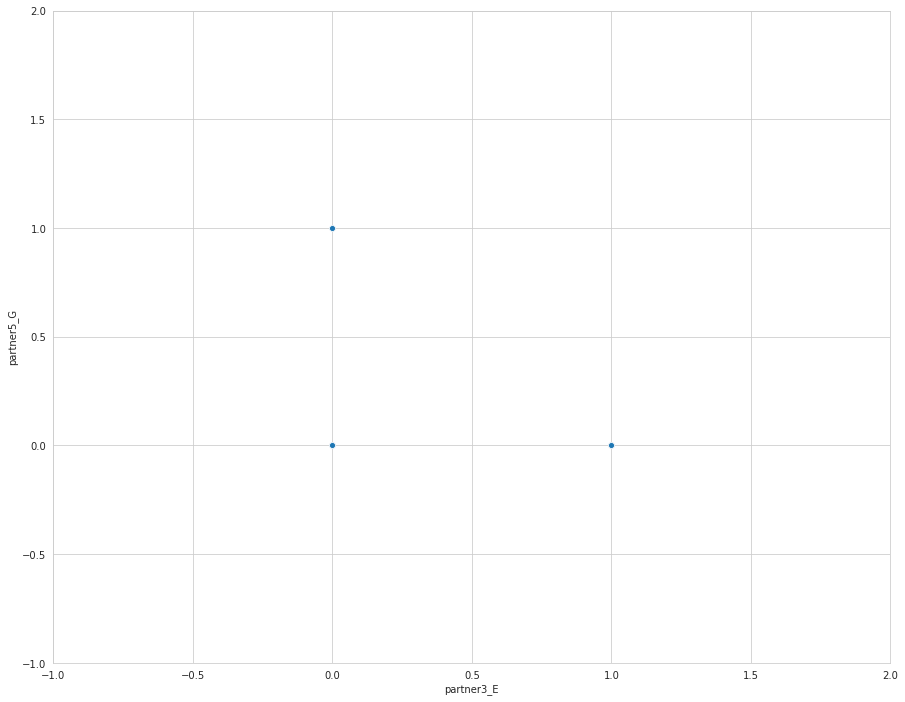

In [439]:
scatter_plot(data, 'partner3_E', 'partner5_G')

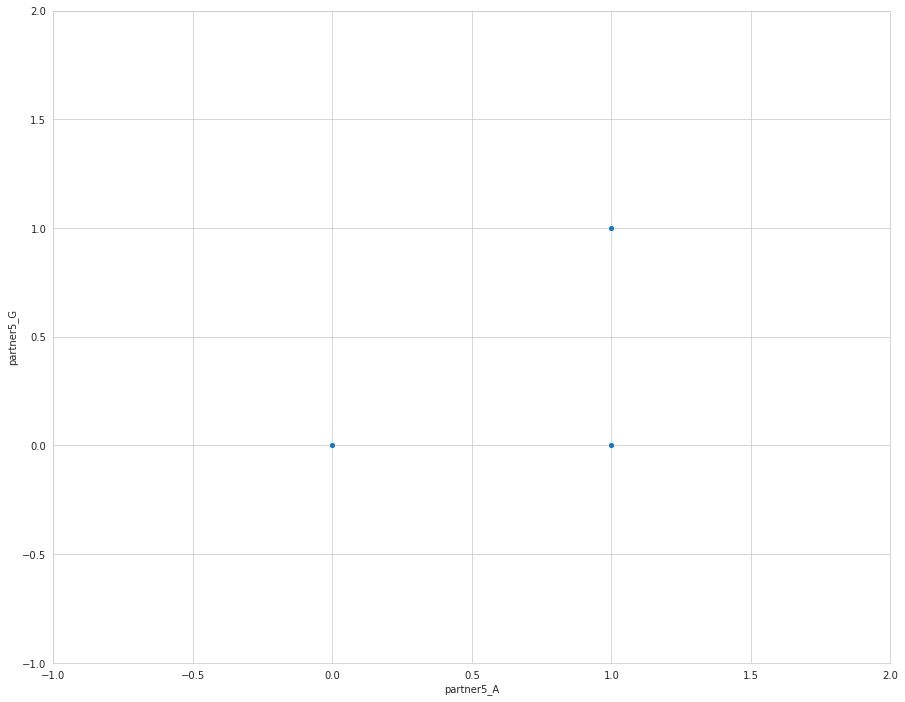

In [444]:
scatter_plot(data, 'partner5_A', 'partner5_G')

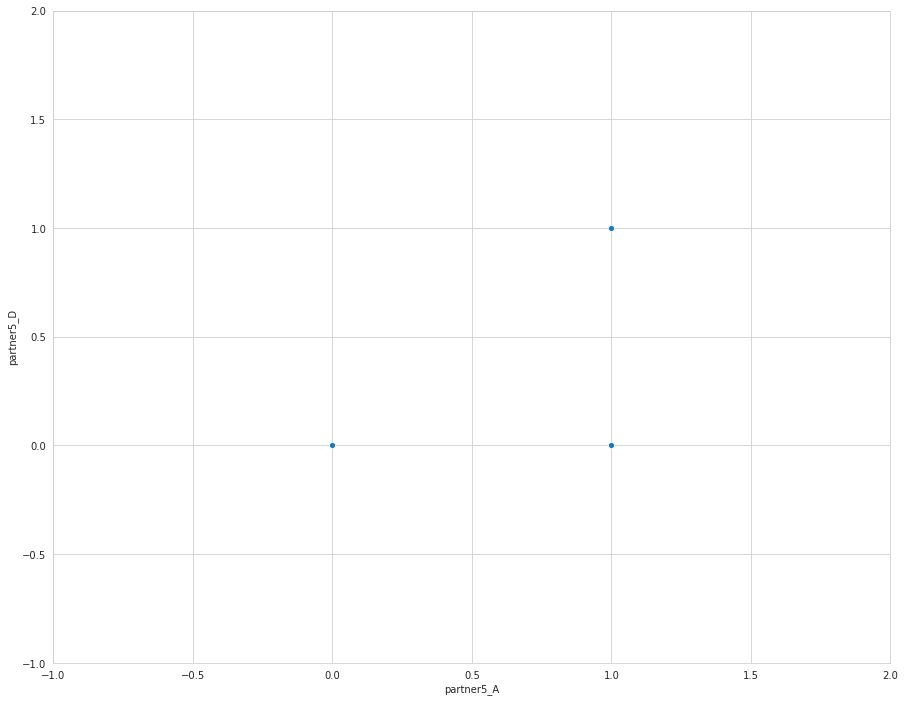

In [445]:
scatter_plot(data, 'partner5_A', 'partner5_D')

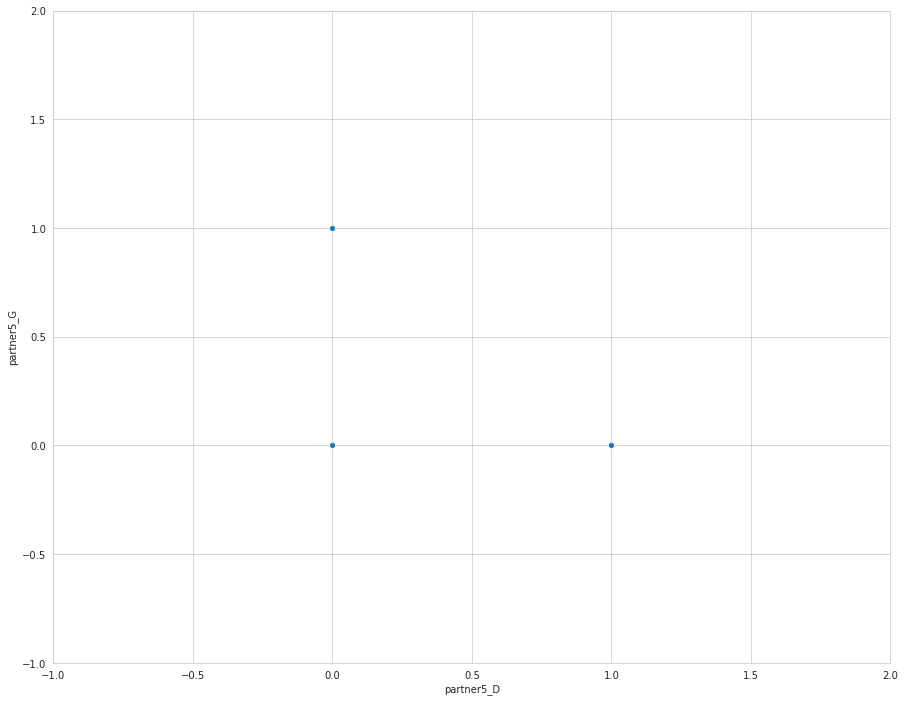

In [446]:
scatter_plot(data, 'partner5_D', 'partner5_G')

<BarContainer object of 20 artists>

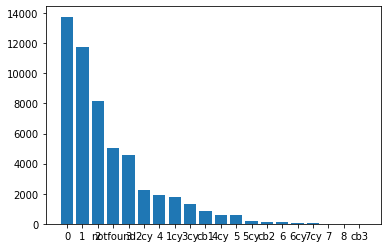

In [10]:
plt.bar(data.brief.value_counts().index, data.brief.value_counts().values)

In [11]:
import pandas as pd

In [12]:
pd.crosstab(data.brief, data.label)

label,0,1
brief,,
0,7912,5859
1,8349,3388
1cy,997,752
2,6492,1652
2cy,1510,768
3,3917,661
3cy,968,359
4,1677,232
4cy,458,145


In [13]:
rf = RandomForestClassifier()